In [1]:
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
lis = pd.read_csv('../madrid/listings_detailed/listings_visual.csv', low_memory=False)
cal = pd.read_csv('../madrid/calendar/calendar_limpio.csv')
ngdf = pd.read_csv('../madrid/ngdf_limpio.csv')
import geopandas as gpd
neighbourhoods_gdf = gpd.read_file('../madrid/neighbourhoods.geojson')

In [3]:
cal.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7605505 entries, 0 to 7605504
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       int64 
 3   price           int64 
 4   minimum_nights  int64 
 5   maximum_nights  int64 
dtypes: int64(5), object(1)
memory usage: 776.1 MB


In [4]:

cal['date'] = pd.to_datetime(cal['date'])

# Crear las columnas 'year', 'month' y 'day' separando la fecha
cal['year'] = cal['date'].dt.year
cal['month'] = cal['date'].dt.month
cal['day'] = cal['date'].dt.day

In [5]:
cal.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,year,month,day
0,336834,2019-09-19,0,63,5,250,2019,9,19
1,6369,2019-09-19,0,70,1,365,2019,9,19
2,6369,2019-09-20,0,75,1,365,2019,9,20
3,6369,2019-09-21,0,75,1,365,2019,9,21
4,6369,2019-09-22,1,70,1,365,2019,9,22


In [6]:
cal.shape

(7605505, 9)

In [7]:
reservas_por_listing = cal.groupby('listing_id')['date'].count().reset_index()
reservas_por_listing.columns = ['listing_id', 'total_reservas']
cal = cal.merge(reservas_por_listing, on='listing_id', how='left')

In [8]:
cal.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,year,month,day,total_reservas
0,336834,2019-09-19,0,63,5,250,2019,9,19,365
1,6369,2019-09-19,0,70,1,365,2019,9,19,365
2,6369,2019-09-20,0,75,1,365,2019,9,20,365
3,6369,2019-09-21,0,75,1,365,2019,9,21,365
4,6369,2019-09-22,1,70,1,365,2019,9,22,365


In [9]:
neighbourhoods_gdf.head()

,neighbourhood,neighbourhood_group,geometry
0,Palacio,Centro,"MULTIPOLYGON (((-3.70584 40.42030, -3.70625 40..."
1,Embajadores,Centro,"MULTIPOLYGON (((-3.70384 40.41432, -3.70277 40..."
2,Cortes,Centro,"MULTIPOLYGON (((-3.69796 40.41929, -3.69645 40..."
3,Justicia,Centro,"MULTIPOLYGON (((-3.69546 40.41898, -3.69645 40..."
4,Universidad,Centro,"MULTIPOLYGON (((-3.70107 40.42134, -3.70155 40..."


In [10]:
lis.head()

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_Apartment,property_type_Boutique hotel,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Chalet,property_type_Condominium,property_type_Dome house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Breakfast table,Indoor fireplace,Convection oven,Soaking tub,Extra space around bed,Essentials,Pets allowed,Electric profiling bed,Heated floors,Bidet,Beach view,Breakfast,Safety card,Fire extinguisher,24-hour check-in,Smart lock,HBO GO,Shampoo,EV charger,Wide entrance for guests,Children’s dinnerware,Lockbox,Smart TV,Wine cooler,High chair,Bathtub,Double oven,Mudroom,Wide hallways,Room-darkening shades,Host greets you,Washer / Dryer,Mini fridge,Wide entryway,Free parking on premises,Cable TV,Cleaning before checkout,Patio or balcony,Internet,Hot tub,Baby monitor,Stair gates,Suitable for events,Washer,Pool with pool hoist,Flat path to guest entrance,Hair dryer,Children’s books and toys,No stairs or steps to enter,Hammock,Accessible-height bed,Keypad,Accessible-height toilet,Microwave,Private entrance,Beachfront,Netflix,Terrace,Other pet(s),Fixed grab bars for shower,Gas oven,Other,Ground floor access,Long term stays allowed,Lake access,Kitchenette,Hot water,Disabled parking spot,Building staff,Shower chair,Pocket wifi,Smoking allowed,Pets live on this property,Extra pillows and blankets,Crib,Well-lit path to entrance,Private living room,Buzzer/wireless intercom,DVD player,Firm mattress,Outlet covers,Roll-in shower,Paid parking off premises,Standing valet,TV,Table corner guards,Game console,Waterfront,Kitchen,Window guards,Mobile hoist,Balcony,Heated towel rack,Self check-in,Bathtub with bath chair,Hangers,Doorman,Toilet paper,Pack ’n Play/travel crib,Rain shower,Babysitter recommendations,Gym,Central air conditioning,Baby bath,En suite bathroom,High-resolution computer monitor,Heating,Warming drawer,Wide clearance to shower,Ski-in/Ski-out,Dishwasher,Wide entrance,Memory foam mattress,Printer,Cooking basics,Paid parking on premises,BBQ grill,Jetted tub,Bed linens,Smoke detector,Bedroom comforts,Body soap,Sound system,Private bathroom,Lock on bedroom door,Shared pool,Cat(s),Pillow-top mattress,Pool,Fireplace guards,Refrigerator,Handheld shower head,Steam oven,Outdoor seating,Laptop friendly workspace,Dog(s),Full kitchen,Air conditioning,Dishes and silverware,Ethernet connection,Touchless faucets,Fixed grab bars for toilet,Dryer,Carbon monoxide detector,Sun loungers,Day bed,Oven,Stove,Bath towel,Coffee maker,Bathroom essentials,Wheelchair accessible,toilet,Single level home,Exercise equipment,First aid kit,Amazon Echo,Wide doorway to guest bathroom,Formal dining area,Beach essentials,Hot water kettle,Family/kid friendly,Elevator,Free street parking,Iron,Wifi,Changing table,Garden or backyard,Walk-in shower,Espresso machine,Luggage dropoff allowed,Projector and screen,Ceiling fan
0,6369,13660,within a few hours,0,1,0,Hispanoamérica

In [11]:
lis.shape

(20758, 240)

In [12]:
lis.neighbourhood_group_cleansed.unique()

array(['Chamartín', 'Latina', 'Centro', 'Arganzuela', 'Salamanca',
       'Tetuán', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberí',
       'Villaverde', 'Hortaleza', 'Moncloa - Aravaca', 'Carabanchel',
       'Retiro', 'San Blas - Canillejas', 'Villa de Vallecas', 'Barajas',
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

In [13]:
lis.head()

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_Apartment,property_type_Boutique hotel,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Chalet,property_type_Condominium,property_type_Dome house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Breakfast table,Indoor fireplace,Convection oven,Soaking tub,Extra space around bed,Essentials,Pets allowed,Electric profiling bed,Heated floors,Bidet,Beach view,Breakfast,Safety card,Fire extinguisher,24-hour check-in,Smart lock,HBO GO,Shampoo,EV charger,Wide entrance for guests,Children’s dinnerware,Lockbox,Smart TV,Wine cooler,High chair,Bathtub,Double oven,Mudroom,Wide hallways,Room-darkening shades,Host greets you,Washer / Dryer,Mini fridge,Wide entryway,Free parking on premises,Cable TV,Cleaning before checkout,Patio or balcony,Internet,Hot tub,Baby monitor,Stair gates,Suitable for events,Washer,Pool with pool hoist,Flat path to guest entrance,Hair dryer,Children’s books and toys,No stairs or steps to enter,Hammock,Accessible-height bed,Keypad,Accessible-height toilet,Microwave,Private entrance,Beachfront,Netflix,Terrace,Other pet(s),Fixed grab bars for shower,Gas oven,Other,Ground floor access,Long term stays allowed,Lake access,Kitchenette,Hot water,Disabled parking spot,Building staff,Shower chair,Pocket wifi,Smoking allowed,Pets live on this property,Extra pillows and blankets,Crib,Well-lit path to entrance,Private living room,Buzzer/wireless intercom,DVD player,Firm mattress,Outlet covers,Roll-in shower,Paid parking off premises,Standing valet,TV,Table corner guards,Game console,Waterfront,Kitchen,Window guards,Mobile hoist,Balcony,Heated towel rack,Self check-in,Bathtub with bath chair,Hangers,Doorman,Toilet paper,Pack ’n Play/travel crib,Rain shower,Babysitter recommendations,Gym,Central air conditioning,Baby bath,En suite bathroom,High-resolution computer monitor,Heating,Warming drawer,Wide clearance to shower,Ski-in/Ski-out,Dishwasher,Wide entrance,Memory foam mattress,Printer,Cooking basics,Paid parking on premises,BBQ grill,Jetted tub,Bed linens,Smoke detector,Bedroom comforts,Body soap,Sound system,Private bathroom,Lock on bedroom door,Shared pool,Cat(s),Pillow-top mattress,Pool,Fireplace guards,Refrigerator,Handheld shower head,Steam oven,Outdoor seating,Laptop friendly workspace,Dog(s),Full kitchen,Air conditioning,Dishes and silverware,Ethernet connection,Touchless faucets,Fixed grab bars for toilet,Dryer,Carbon monoxide detector,Sun loungers,Day bed,Oven,Stove,Bath towel,Coffee maker,Bathroom essentials,Wheelchair accessible,toilet,Single level home,Exercise equipment,First aid kit,Amazon Echo,Wide doorway to guest bathroom,Formal dining area,Beach essentials,Hot water kettle,Family/kid friendly,Elevator,Free street parking,Iron,Wifi,Changing table,Garden or backyard,Walk-in shower,Espresso machine,Luggage dropoff allowed,Projector and screen,Ceiling fan
0,6369,13660,within a few hours,0,1,0,Hispanoamérica

In [14]:
mean_bedrooms = lis.groupby('neighbourhood_group_cleansed')['bedrooms'].mean()

# crear un nuevo DataFrame con los resultados
mean_bedrooms_df = pd.DataFrame(mean_bedrooms).reset_index()

# renombrar la columna de la media de bedrooms
mean_bedrooms_df = mean_bedrooms_df.rename(columns={'bedrooms': 'mean_bedrooms'})

# unir el nuevo DataFrame con el original
lis = lis.merge(mean_bedrooms_df, on='neighbourhood_group_cleansed')

# ahora tienes una nueva columna en tu DataFrame llamada mean_bedrooms que contiene la media de bedrooms por barrio

In [15]:
lis.head()

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_Apartment,property_type_Boutique hotel,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Chalet,property_type_Condominium,property_type_Dome house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Breakfast table,Indoor fireplace,Convection oven,Soaking tub,Extra space around bed,Essentials,Pets allowed,Electric profiling bed,Heated floors,Bidet,Beach view,Breakfast,Safety card,Fire extinguisher,24-hour check-in,Smart lock,HBO GO,Shampoo,EV charger,Wide entrance for guests,Children’s dinnerware,Lockbox,Smart TV,Wine cooler,High chair,Bathtub,Double oven,Mudroom,Wide hallways,Room-darkening shades,Host greets you,Washer / Dryer,Mini fridge,Wide entryway,Free parking on premises,Cable TV,Cleaning before checkout,Patio or balcony,Internet,Hot tub,Baby monitor,Stair gates,Suitable for events,Washer,Pool with pool hoist,Flat path to guest entrance,Hair dryer,Children’s books and toys,No stairs or steps to enter,Hammock,Accessible-height bed,Keypad,Accessible-height toilet,Microwave,Private entrance,Beachfront,Netflix,Terrace,Other pet(s),Fixed grab bars for shower,Gas oven,Other,Ground floor access,Long term stays allowed,Lake access,Kitchenette,Hot water,Disabled parking spot,Building staff,Shower chair,Pocket wifi,Smoking allowed,Pets live on this property,Extra pillows and blankets,Crib,Well-lit path to entrance,Private living room,Buzzer/wireless intercom,DVD player,Firm mattress,Outlet covers,Roll-in shower,Paid parking off premises,Standing valet,TV,Table corner guards,Game console,Waterfront,Kitchen,Window guards,Mobile hoist,Balcony,Heated towel rack,Self check-in,Bathtub with bath chair,Hangers,Doorman,Toilet paper,Pack ’n Play/travel crib,Rain shower,Babysitter recommendations,Gym,Central air conditioning,Baby bath,En suite bathroom,High-resolution computer monitor,Heating,Warming drawer,Wide clearance to shower,Ski-in/Ski-out,Dishwasher,Wide entrance,Memory foam mattress,Printer,Cooking basics,Paid parking on premises,BBQ grill,Jetted tub,Bed linens,Smoke detector,Bedroom comforts,Body soap,Sound system,Private bathroom,Lock on bedroom door,Shared pool,Cat(s),Pillow-top mattress,Pool,Fireplace guards,Refrigerator,Handheld shower head,Steam oven,Outdoor seating,Laptop friendly workspace,Dog(s),Full kitchen,Air conditioning,Dishes and silverware,Ethernet connection,Touchless faucets,Fixed grab bars for toilet,Dryer,Carbon monoxide detector,Sun loungers,Day bed,Oven,Stove,Bath towel,Coffee maker,Bathroom essentials,Wheelchair accessible,toilet,Single level home,Exercise equipment,First aid kit,Amazon Echo,Wide doorway to guest bathroom,Formal dining area,Beach essentials,Hot water kettle,Family/kid friendly,Elevator,Free street parking,Iron,Wifi,Changing table,Garden or backyard,Walk-in shower,Espresso machine,Luggage dropoff allowed,Projector and screen,Ceiling fan,mean_bedrooms
0,6369,13660,within a few hours,0,1,0,

In [16]:
lis.shape

(20758, 241)

<Axes: xlabel='neighbourhood_group_cleansed'>

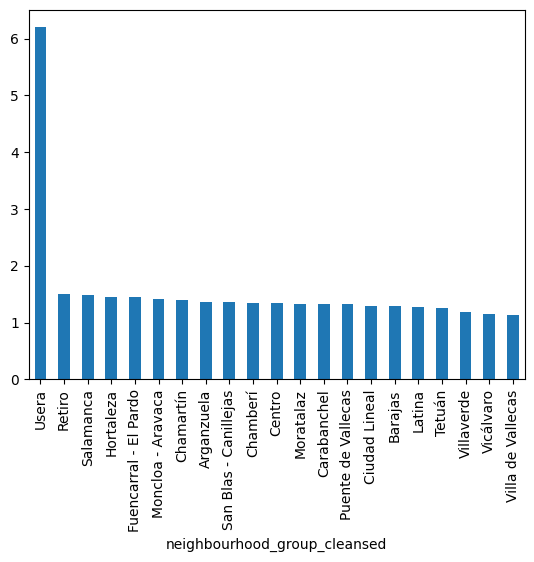

In [17]:
lis.groupby('neighbourhood_group_cleansed')['mean_bedrooms'].mean().sort_values(ascending=False).plot(kind='bar')

In [18]:
lis = lis.drop(columns=['Beach view'])
lis = lis.drop(columns=['Pool with pool hoist'])
lis = lis.drop(columns=['Beachfront'])
lis = lis.drop(columns=['Waterfront'])
lis = lis.drop(columns=['Pack ’n Play/travel crib'])


In [19]:
lis.shape

(20758, 236)

In [20]:
lis.head()

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_Apartment,property_type_Boutique hotel,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Chalet,property_type_Condominium,property_type_Dome house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Breakfast table,Indoor fireplace,Convection oven,Soaking tub,Extra space around bed,Essentials,Pets allowed,Electric profiling bed,Heated floors,Bidet,Breakfast,Safety card,Fire extinguisher,24-hour check-in,Smart lock,HBO GO,Shampoo,EV charger,Wide entrance for guests,Children’s dinnerware,Lockbox,Smart TV,Wine cooler,High chair,Bathtub,Double oven,Mudroom,Wide hallways,Room-darkening shades,Host greets you,Washer / Dryer,Mini fridge,Wide entryway,Free parking on premises,Cable TV,Cleaning before checkout,Patio or balcony,Internet,Hot tub,Baby monitor,Stair gates,Suitable for events,Washer,Flat path to guest entrance,Hair dryer,Children’s books and toys,No stairs or steps to enter,Hammock,Accessible-height bed,Keypad,Accessible-height toilet,Microwave,Private entrance,Netflix,Terrace,Other pet(s),Fixed grab bars for shower,Gas oven,Other,Ground floor access,Long term stays allowed,Lake access,Kitchenette,Hot water,Disabled parking spot,Building staff,Shower chair,Pocket wifi,Smoking allowed,Pets live on this property,Extra pillows and blankets,Crib,Well-lit path to entrance,Private living room,Buzzer/wireless intercom,DVD player,Firm mattress,Outlet covers,Roll-in shower,Paid parking off premises,Standing valet,TV,Table corner guards,Game console,Kitchen,Window guards,Mobile hoist,Balcony,Heated towel rack,Self check-in,Bathtub with bath chair,Hangers,Doorman,Toilet paper,Rain shower,Babysitter recommendations,Gym,Central air conditioning,Baby bath,En suite bathroom,High-resolution computer monitor,Heating,Warming drawer,Wide clearance to shower,Ski-in/Ski-out,Dishwasher,Wide entrance,Memory foam mattress,Printer,Cooking basics,Paid parking on premises,BBQ grill,Jetted tub,Bed linens,Smoke detector,Bedroom comforts,Body soap,Sound system,Private bathroom,Lock on bedroom door,Shared pool,Cat(s),Pillow-top mattress,Pool,Fireplace guards,Refrigerator,Handheld shower head,Steam oven,Outdoor seating,Laptop friendly workspace,Dog(s),Full kitchen,Air conditioning,Dishes and silverware,Ethernet connection,Touchless faucets,Fixed grab bars for toilet,Dryer,Carbon monoxide detector,Sun loungers,Day bed,Oven,Stove,Bath towel,Coffee maker,Bathroom essentials,Wheelchair accessible,toilet,Single level home,Exercise equipment,First aid kit,Amazon Echo,Wide doorway to guest bathroom,Formal dining area,Beach essentials,Hot water kettle,Family/kid friendly,Elevator,Free street parking,Iron,Wifi,Changing table,Garden or backyard,Walk-in shower,Espresso machine,Luggage dropoff allowed,Projector and screen,Ceiling fan,mean_bedrooms
0,6369,13660,within a few hours,0,1,0,Hispanoamérica,Chamartín,40.45628,-3.67763,2,1,1,0,70,0,5,2,15,1,365,14,23,53,5

In [21]:
amenities = ['Breakfast table', 'Indoor fireplace', 'Convection oven', 'Soaking tub', 'Extra space around bed', 'Essentials', 'Pets allowed', 'Electric profiling bed', 'Heated floors', 'Bidet', 'Breakfast', 'Safety card', 'Fire extinguisher', '24-hour check-in', 'Smart lock', 'HBO GO', 'Shampoo', 'EV charger', 'Wide entrance for guests', 'Children’s dinnerware', 'Lockbox', 'Smart TV', 'Wine cooler', 'High chair', 'Bathtub', 'Double oven', 'Mudroom', 'Wide hallways', 'Room-darkening shades', 'Host greets you', 'Washer / Dryer', 'Mini fridge', 'Wide entryway', 'Free parking on premises', 'Cable TV', 'Cleaning before checkout', 'Patio or balcony', 'Internet', 'Hot tub', 'Baby monitor', 'Stair gates', 'Suitable for events', 'Washer', 'Flat path to guest entrance', 'Hair dryer', 'Children’s books and toys', 'No stairs or steps to enter', 'Hammock', 'Accessible-height bed', 'Keypad', 'Accessible-height toilet', 'Microwave', 'Private entrance', 'Netflix', 'Terrace', 'Other pet(s)', 'Fixed grab bars for shower', 'Gas oven', 'Other', 'Ground floor access', 'Long term stays allowed', 'Lake access', 'Kitchenette', 'Hot water', 'Disabled parking spot', 'Building staff', 'Shower chair', 'Pocket wifi', 'Smoking allowed', 'Pets live on this property', 'Extra pillows and blankets', 'Crib', 'Well-lit path to entrance', 'Private living room', 'Buzzer/wireless intercom', 'DVD player', 'Firm mattress', 'Outlet covers', 'Roll-in shower', 'Paid parking off premises', 'Standing valet', 'TV', 'Table corner guards', 'Game console', 'Kitchen', 'Window guards', 'Mobile hoist', 'Balcony', 'Heated towel rack', 'Self check-in', 'Bathtub with bath chair', 'Hangers', 'Doorman', 'Toilet paper', 'Rain shower', 'Babysitter recommendations', 'Gym', 'Central air conditioning', 'Baby bath', 'En suite bathroom', 'High-resolution computer monitor', 'Heating', 'Warming drawer', 'Wide clearance to shower', 'Ski-in/Ski-out', 'Dishwasher', 'Wide entrance', 'Memory foam mattress', 'Printer', 'Cooking basics', 'Paid parking on premises', 'BBQ grill', 'Jetted tub', 'Bed linens', 'Smoke detector', 'Bedroom comforts', 'Body soap', 'Sound system', 'Private bathroom', 'Lock on bedroom door', 'Shared pool', 'Cat(s)', 'Pillow-top mattress', 'Pool', 'Fireplace guards', 'Refrigerator', 'Handheld shower head', 'Steam oven', 'Outdoor seating', 'Laptop friendly workspace', 'Dog(s)', 'Full kitchen', 'Air conditioning', 'Dishes and silverware', 'Ethernet connection', 'Touchless faucets', 'Fixed grab bars for toilet', 'Dryer', 'Carbon monoxide detector', 'Sun loungers', 'Day bed', 'Oven', 'Stove', 'Bath towel',
             'Coffee maker', 'Bathroom essentials', 'Wheelchair accessible', 'toilet', 'Single level home', 'Exercise equipment', 'First aid kit', 'Amazon Echo', 'Wide doorway to guest bathroom', 'Formal dining area', 'Beach essentials', 'Hot water kettle', 'Family/kid friendly', 'Elevator', 'Free street parking', 'Iron', 'Wifi', 'Changing table', 'Garden or backyard', 'Walk-in shower', 'Espresso machine', 'Luggage dropoff allowed', 'Projector and screen', 'Ceiling fan']
    
    
    
    
    
    
    
    
                  
lis['amenities_count'] = lis[amenities].sum(axis=1)


In [22]:
lis.head()

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_Apartment,property_type_Boutique hotel,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Chalet,property_type_Condominium,property_type_Dome house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Breakfast table,Indoor fireplace,Convection oven,Soaking tub,Extra space around bed,Essentials,Pets allowed,Electric profiling bed,Heated floors,Bidet,Breakfast,Safety card,Fire extinguisher,24-hour check-in,Smart lock,HBO GO,Shampoo,EV charger,Wide entrance for guests,Children’s dinnerware,Lockbox,Smart TV,Wine cooler,High chair,Bathtub,Double oven,Mudroom,Wide hallways,Room-darkening shades,Host greets you,Washer / Dryer,Mini fridge,Wide entryway,Free parking on premises,Cable TV,Cleaning before checkout,Patio or balcony,Internet,Hot tub,Baby monitor,Stair gates,Suitable for events,Washer,Flat path to guest entrance,Hair dryer,Children’s books and toys,No stairs or steps to enter,Hammock,Accessible-height bed,Keypad,Accessible-height toilet,Microwave,Private entrance,Netflix,Terrace,Other pet(s),Fixed grab bars for shower,Gas oven,Other,Ground floor access,Long term stays allowed,Lake access,Kitchenette,Hot water,Disabled parking spot,Building staff,Shower chair,Pocket wifi,Smoking allowed,Pets live on this property,Extra pillows and blankets,Crib,Well-lit path to entrance,Private living room,Buzzer/wireless intercom,DVD player,Firm mattress,Outlet covers,Roll-in shower,Paid parking off premises,Standing valet,TV,Table corner guards,Game console,Kitchen,Window guards,Mobile hoist,Balcony,Heated towel rack,Self check-in,Bathtub with bath chair,Hangers,Doorman,Toilet paper,Rain shower,Babysitter recommendations,Gym,Central air conditioning,Baby bath,En suite bathroom,High-resolution computer monitor,Heating,Warming drawer,Wide clearance to shower,Ski-in/Ski-out,Dishwasher,Wide entrance,Memory foam mattress,Printer,Cooking basics,Paid parking on premises,BBQ grill,Jetted tub,Bed linens,Smoke detector,Bedroom comforts,Body soap,Sound system,Private bathroom,Lock on bedroom door,Shared pool,Cat(s),Pillow-top mattress,Pool,Fireplace guards,Refrigerator,Handheld shower head,Steam oven,Outdoor seating,Laptop friendly workspace,Dog(s),Full kitchen,Air conditioning,Dishes and silverware,Ethernet connection,Touchless faucets,Fixed grab bars for toilet,Dryer,Carbon monoxide detector,Sun loungers,Day bed,Oven,Stove,Bath towel,Coffee maker,Bathroom essentials,Wheelchair accessible,toilet,Single level home,Exercise equipment,First aid kit,Amazon Echo,Wide doorway to guest bathroom,Formal dining area,Beach essentials,Hot water kettle,Family/kid friendly,Elevator,Free street parking,Iron,Wifi,Changing table,Garden or backyard,Walk-in shower,Espresso machine,Luggage dropoff allowed,Projector and screen,Ceiling fan,mean_bedrooms,amenities_count
0,6369,13660,within a few hours,0,1,0,Hispanoamérica,Chamartín,40.45628,-3.67763,2,1,1,0,70,0,5,2,15,

In [23]:
mean_cleanliness = lis.groupby('id')['review_scores_cleanliness'].transform('mean')
lis['mean_cleanliness'] = mean_cleanliness

In [24]:
mean_accuracy = lis.groupby('id')['review_scores_accuracy'].transform('mean')
lis['mean_accuracy'] = mean_accuracy

In [25]:
mean_checkin = lis.groupby('id')['review_scores_checkin'].transform('mean')
lis['mean_checkin'] = mean_checkin

In [26]:
mean_communication = lis.groupby('id')['review_scores_communication'].transform('mean')
lis['mean_communication'] = mean_communication

In [27]:
mean_location = lis.groupby('id')['review_scores_location'].transform('mean')
lis['mean_location'] = mean_location

In [28]:
lis.head()

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_Apartment,property_type_Boutique hotel,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Chalet,property_type_Condominium,property_type_Dome house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Breakfast table,Indoor fireplace,Convection oven,Soaking tub,Extra space around bed,Essentials,Pets allowed,Electric profiling bed,Heated floors,Bidet,Breakfast,Safety card,Fire extinguisher,24-hour check-in,Smart lock,HBO GO,Shampoo,EV charger,Wide entrance for guests,Children’s dinnerware,Lockbox,Smart TV,Wine cooler,High chair,Bathtub,Double oven,Mudroom,Wide hallways,Room-darkening shades,Host greets you,Washer / Dryer,Mini fridge,Wide entryway,Free parking on premises,Cable TV,Cleaning before checkout,Patio or balcony,Internet,Hot tub,Baby monitor,Stair gates,Suitable for events,Washer,Flat path to guest entrance,Hair dryer,Children’s books and toys,No stairs or steps to enter,Hammock,Accessible-height bed,Keypad,Accessible-height toilet,Microwave,Private entrance,Netflix,Terrace,Other pet(s),Fixed grab bars for shower,Gas oven,Other,Ground floor access,Long term stays allowed,Lake access,Kitchenette,Hot water,Disabled parking spot,Building staff,Shower chair,Pocket wifi,Smoking allowed,Pets live on this property,Extra pillows and blankets,Crib,Well-lit path to entrance,Private living room,Buzzer/wireless intercom,DVD player,Firm mattress,Outlet covers,Roll-in shower,Paid parking off premises,Standing valet,TV,Table corner guards,Game console,Kitchen,Window guards,Mobile hoist,Balcony,Heated towel rack,Self check-in,Bathtub with bath chair,Hangers,Doorman,Toilet paper,Rain shower,Babysitter recommendations,Gym,Central air conditioning,Baby bath,En suite bathroom,High-resolution computer monitor,Heating,Warming drawer,Wide clearance to shower,Ski-in/Ski-out,Dishwasher,Wide entrance,Memory foam mattress,Printer,Cooking basics,Paid parking on premises,BBQ grill,Jetted tub,Bed linens,Smoke detector,Bedroom comforts,Body soap,Sound system,Private bathroom,Lock on bedroom door,Shared pool,Cat(s),Pillow-top mattress,Pool,Fireplace guards,Refrigerator,Handheld shower head,Steam oven,Outdoor seating,Laptop friendly workspace,Dog(s),Full kitchen,Air conditioning,Dishes and silverware,Ethernet connection,Touchless faucets,Fixed grab bars for toilet,Dryer,Carbon monoxide detector,Sun loungers,Day bed,Oven,Stove,Bath towel,Coffee maker,Bathroom essentials,Wheelchair accessible,toilet,Single level home,Exercise equipment,First aid kit,Amazon Echo,Wide doorway to guest bathroom,Formal dining area,Beach essentials,Hot water kettle,Family/kid friendly,Elevator,Free street parking,Iron,Wifi,Changing table,Garden or backyard,Walk-in shower,Espresso machine,Luggage dropoff allowed,Projector and screen,Ceiling fan,mean_bedrooms,amenities_count,mean_cleanliness,mean_accuracy,mean_checkin,mean_communication,mean_location
0,6369,13660,within a fe

In [29]:
lis.to_csv('../madrid/listings_detailed/lis_definitivo.csv', index=False)

In [30]:
lis = lis.rename(columns=lambda x: x.strip().replace(' ', '_'))

# Muestra el DataFrame con los nuevos nombres de columna


In [31]:
lis.head()

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_Apartment,property_type_Boutique_hotel,property_type_Camper/RV,property_type_Casa_particular_(Cuba),property_type_Chalet,property_type_Condominium,property_type_Dome_house,property_type_Guest_suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Tiny_house,property_type_Townhouse,property_type_Villa,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out_Sofa,bed_type_Real_Bed,Breakfast_table,Indoor_fireplace,Convection_oven,Soaking_tub,Extra_space_around_bed,Essentials,Pets_allowed,Electric_profiling_bed,Heated_floors,Bidet,Breakfast,Safety_card,Fire_extinguisher,24-hour_check-in,Smart_lock,HBO_GO,Shampoo,EV_charger,Wide_entrance_for_guests,Children’s_dinnerware,Lockbox,Smart_TV,Wine_cooler,High_chair,Bathtub,Double_oven,Mudroom,Wide_hallways,Room-darkening_shades,Host_greets_you,Washer_/_Dryer,Mini_fridge,Wide_entryway,Free_parking_on_premises,Cable_TV,Cleaning_before_checkout,Patio_or_balcony,Internet,Hot_tub,Baby_monitor,Stair_gates,Suitable_for_events,Washer,Flat_path_to_guest_entrance,Hair_dryer,Children’s_books_and_toys,No_stairs_or_steps_to_enter,Hammock,Accessible-height_bed,Keypad,Accessible-height_toilet,Microwave,Private_entrance,Netflix,Terrace,Other_pet(s),Fixed_grab_bars_for_shower,Gas_oven,Other,Ground_floor_access,Long_term_stays_allowed,Lake_access,Kitchenette,Hot_water,Disabled_parking_spot,Building_staff,Shower_chair,Pocket_wifi,Smoking_allowed,Pets_live_on_this_property,Extra_pillows_and_blankets,Crib,Well-lit_path_to_entrance,Private_living_room,Buzzer/wireless_intercom,DVD_player,Firm_mattress,Outlet_covers,Roll-in_shower,Paid_parking_off_premises,Standing_valet,TV,Table_corner_guards,Game_console,Kitchen,Window_guards,Mobile_hoist,Balcony,Heated_towel_rack,Self_check-in,Bathtub_with_bath_chair,Hangers,Doorman,Toilet_paper,Rain_shower,Babysitter_recommendations,Gym,Central_air_conditioning,Baby_bath,En_suite_bathroom,High-resolution_computer_monitor,Heating,Warming_drawer,Wide_clearance_to_shower,Ski-in/Ski-out,Dishwasher,Wide_entrance,Memory_foam_mattress,Printer,Cooking_basics,Paid_parking_on_premises,BBQ_grill,Jetted_tub,Bed_linens,Smoke_detector,Bedroom_comforts,Body_soap,Sound_system,Private_bathroom,Lock_on_bedroom_door,Shared_pool,Cat(s),Pillow-top_mattress,Pool,Fireplace_guards,Refrigerator,Handheld_shower_head,Steam_oven,Outdoor_seating,Laptop_friendly_workspace,Dog(s),Full_kitchen,Air_conditioning,Dishes_and_silverware,Ethernet_connection,Touchless_faucets,Fixed_grab_bars_for_toilet,Dryer,Carbon_monoxide_detector,Sun_loungers,Day_bed,Oven,Stove,Bath_towel,Coffee_maker,Bathroom_essentials,Wheelchair_accessible,toilet,Single_level_home,Exercise_equipment,First_aid_kit,Amazon_Echo,Wide_doorway_to_guest_bathroom,Formal_dining_area,Beach_essentials,Hot_water_kettle,Family/kid_friendly,Elevator,Free_street_parking,Iron,Wifi,Changing_table,Garden_or_backyard,Walk-in_shower,Espresso_machine,Luggage_dropoff_allowed,Projector_and_screen,Ceiling_fan,mean_bedrooms,amenities_count,mean_cleanliness,mean_accuracy,mean_checkin,mean_communication,mean_location
0,6369,13660,within a fe

In [32]:
lis.to_csv('../madrid/listings_detailed/lis_definitivo2.csv', index=False)

In [33]:
lis.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20757
Columns: 242 entries, id to mean_location
dtypes: float64(11), int64(227), object(4)
memory usage: 43.1 MB


In [34]:
lis = lis.astype(str)

In [35]:
lis.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20757
Columns: 242 entries, id to mean_location
dtypes: object(242)
memory usage: 281.2 MB


In [36]:
lis.to_csv('../madrid/listings_detailed/lis_definitivo3.csv', index=False)

In [37]:
lis = lis.rename(columns=lambda x: x.strip().replace(' ', '_').lower())

In [38]:
lis.head()

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_apartment,property_type_boutique_hotel,property_type_camper/rv,property_type_casa_particular_(cuba),property_type_chalet,property_type_condominium,property_type_dome_house,property_type_guest_suite,property_type_guesthouse,property_type_hostel,property_type_hotel,property_type_house,property_type_loft,property_type_other,property_type_tiny_house,property_type_townhouse,property_type_villa,room_type_hotel_room,room_type_private_room,room_type_shared_room,bed_type_couch,bed_type_futon,bed_type_pull-out_sofa,bed_type_real_bed,breakfast_table,indoor_fireplace,convection_oven,soaking_tub,extra_space_around_bed,essentials,pets_allowed,electric_profiling_bed,heated_floors,bidet,breakfast,safety_card,fire_extinguisher,24-hour_check-in,smart_lock,hbo_go,shampoo,ev_charger,wide_entrance_for_guests,children’s_dinnerware,lockbox,smart_tv,wine_cooler,high_chair,bathtub,double_oven,mudroom,wide_hallways,room-darkening_shades,host_greets_you,washer_/_dryer,mini_fridge,wide_entryway,free_parking_on_premises,cable_tv,cleaning_before_checkout,patio_or_balcony,internet,hot_tub,baby_monitor,stair_gates,suitable_for_events,washer,flat_path_to_guest_entrance,hair_dryer,children’s_books_and_toys,no_stairs_or_steps_to_enter,hammock,accessible-height_bed,keypad,accessible-height_toilet,microwave,private_entrance,netflix,terrace,other_pet(s),fixed_grab_bars_for_shower,gas_oven,other,ground_floor_access,long_term_stays_allowed,lake_access,kitchenette,hot_water,disabled_parking_spot,building_staff,shower_chair,pocket_wifi,smoking_allowed,pets_live_on_this_property,extra_pillows_and_blankets,crib,well-lit_path_to_entrance,private_living_room,buzzer/wireless_intercom,dvd_player,firm_mattress,outlet_covers,roll-in_shower,paid_parking_off_premises,standing_valet,tv,table_corner_guards,game_console,kitchen,window_guards,mobile_hoist,balcony,heated_towel_rack,self_check-in,bathtub_with_bath_chair,hangers,doorman,toilet_paper,rain_shower,babysitter_recommendations,gym,central_air_conditioning,baby_bath,en_suite_bathroom,high-resolution_computer_monitor,heating,warming_drawer,wide_clearance_to_shower,ski-in/ski-out,dishwasher,wide_entrance,memory_foam_mattress,printer,cooking_basics,paid_parking_on_premises,bbq_grill,jetted_tub,bed_linens,smoke_detector,bedroom_comforts,body_soap,sound_system,private_bathroom,lock_on_bedroom_door,shared_pool,cat(s),pillow-top_mattress,pool,fireplace_guards,refrigerator,handheld_shower_head,steam_oven,outdoor_seating,laptop_friendly_workspace,dog(s),full_kitchen,air_conditioning,dishes_and_silverware,ethernet_connection,touchless_faucets,fixed_grab_bars_for_toilet,dryer,carbon_monoxide_detector,sun_loungers,day_bed,oven,stove,bath_towel,coffee_maker,bathroom_essentials,wheelchair_accessible,toilet,single_level_home,exercise_equipment,first_aid_kit,amazon_echo,wide_doorway_to_guest_bathroom,formal_dining_area,beach_essentials,hot_water_kettle,family/kid_friendly,elevator,free_street_parking,iron,wifi,changing_table,garden_or_backyard,walk-in_shower,espresso_machine,luggage_dropoff_allowed,projector_and_screen,ceiling_fan,mean_bedrooms,amenities_count,mean_cleanliness,mean_accuracy,mean_checkin,mean_communication,mean_location
0,6369,13660,within a fe

In [39]:
lis.to_csv('../madrid/listings_detailed/lis_definitivo4.csv', index=False)

In [40]:
lis.head()

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_apartment,property_type_boutique_hotel,property_type_camper/rv,property_type_casa_particular_(cuba),property_type_chalet,property_type_condominium,property_type_dome_house,property_type_guest_suite,property_type_guesthouse,property_type_hostel,property_type_hotel,property_type_house,property_type_loft,property_type_other,property_type_tiny_house,property_type_townhouse,property_type_villa,room_type_hotel_room,room_type_private_room,room_type_shared_room,bed_type_couch,bed_type_futon,bed_type_pull-out_sofa,bed_type_real_bed,breakfast_table,indoor_fireplace,convection_oven,soaking_tub,extra_space_around_bed,essentials,pets_allowed,electric_profiling_bed,heated_floors,bidet,breakfast,safety_card,fire_extinguisher,24-hour_check-in,smart_lock,hbo_go,shampoo,ev_charger,wide_entrance_for_guests,children’s_dinnerware,lockbox,smart_tv,wine_cooler,high_chair,bathtub,double_oven,mudroom,wide_hallways,room-darkening_shades,host_greets_you,washer_/_dryer,mini_fridge,wide_entryway,free_parking_on_premises,cable_tv,cleaning_before_checkout,patio_or_balcony,internet,hot_tub,baby_monitor,stair_gates,suitable_for_events,washer,flat_path_to_guest_entrance,hair_dryer,children’s_books_and_toys,no_stairs_or_steps_to_enter,hammock,accessible-height_bed,keypad,accessible-height_toilet,microwave,private_entrance,netflix,terrace,other_pet(s),fixed_grab_bars_for_shower,gas_oven,other,ground_floor_access,long_term_stays_allowed,lake_access,kitchenette,hot_water,disabled_parking_spot,building_staff,shower_chair,pocket_wifi,smoking_allowed,pets_live_on_this_property,extra_pillows_and_blankets,crib,well-lit_path_to_entrance,private_living_room,buzzer/wireless_intercom,dvd_player,firm_mattress,outlet_covers,roll-in_shower,paid_parking_off_premises,standing_valet,tv,table_corner_guards,game_console,kitchen,window_guards,mobile_hoist,balcony,heated_towel_rack,self_check-in,bathtub_with_bath_chair,hangers,doorman,toilet_paper,rain_shower,babysitter_recommendations,gym,central_air_conditioning,baby_bath,en_suite_bathroom,high-resolution_computer_monitor,heating,warming_drawer,wide_clearance_to_shower,ski-in/ski-out,dishwasher,wide_entrance,memory_foam_mattress,printer,cooking_basics,paid_parking_on_premises,bbq_grill,jetted_tub,bed_linens,smoke_detector,bedroom_comforts,body_soap,sound_system,private_bathroom,lock_on_bedroom_door,shared_pool,cat(s),pillow-top_mattress,pool,fireplace_guards,refrigerator,handheld_shower_head,steam_oven,outdoor_seating,laptop_friendly_workspace,dog(s),full_kitchen,air_conditioning,dishes_and_silverware,ethernet_connection,touchless_faucets,fixed_grab_bars_for_toilet,dryer,carbon_monoxide_detector,sun_loungers,day_bed,oven,stove,bath_towel,coffee_maker,bathroom_essentials,wheelchair_accessible,toilet,single_level_home,exercise_equipment,first_aid_kit,amazon_echo,wide_doorway_to_guest_bathroom,formal_dining_area,beach_essentials,hot_water_kettle,family/kid_friendly,elevator,free_street_parking,iron,wifi,changing_table,garden_or_backyard,walk-in_shower,espresso_machine,luggage_dropoff_allowed,projector_and_screen,ceiling_fan,mean_bedrooms,amenities_count,mean_cleanliness,mean_accuracy,mean_checkin,mean_communication,mean_location
0,6369,13660,within a fe

In [50]:
no_numeric_cols = ['id', 'host_id', 'host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'require_guest_profile_picture', 'x', 'y', 'z']

# Convertir todas las columnas excepto las de no_numeric_cols a numérico
numeric_cols = [col for col in lis.columns if col not in no_numeric_cols]
lis[numeric_cols] = lis[numeric_cols].apply(pd.to_numeric)

# Mostrar el DataFrame convertido
print(lis.dtypes)

id                       object
host_id                  object
host_response_time       object
host_is_superhost         int64
host_has_profile_pic      int64
                         ...   
mean_cleanliness        float64
mean_accuracy           float64
mean_checkin            float64
mean_communication      float64
mean_location           float64
Length: 242, dtype: object


In [48]:
print(lis['breakfast_table'].unique())

['0' '1']


In [53]:
lis[lis['breakfast_table'] == 1]

,id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,x,y,z,property_type_apartment,property_type_boutique_hotel,property_type_camper/rv,property_type_casa_particular_(cuba),property_type_chalet,property_type_condominium,property_type_dome_house,property_type_guest_suite,property_type_guesthouse,property_type_hostel,property_type_hotel,property_type_house,property_type_loft,property_type_other,property_type_tiny_house,property_type_townhouse,property_type_villa,room_type_hotel_room,room_type_private_room,room_type_shared_room,bed_type_couch,bed_type_futon,bed_type_pull-out_sofa,bed_type_real_bed,breakfast_table,indoor_fireplace,convection_oven,soaking_tub,extra_space_around_bed,essentials,pets_allowed,electric_profiling_bed,heated_floors,bidet,breakfast,safety_card,fire_extinguisher,24-hour_check-in,smart_lock,hbo_go,shampoo,ev_charger,wide_entrance_for_guests,children’s_dinnerware,lockbox,smart_tv,wine_cooler,high_chair,bathtub,double_oven,mudroom,wide_hallways,room-darkening_shades,host_greets_you,washer_/_dryer,mini_fridge,wide_entryway,free_parking_on_premises,cable_tv,cleaning_before_checkout,patio_or_balcony,internet,hot_tub,baby_monitor,stair_gates,suitable_for_events,washer,flat_path_to_guest_entrance,hair_dryer,children’s_books_and_toys,no_stairs_or_steps_to_enter,hammock,accessible-height_bed,keypad,accessible-height_toilet,microwave,private_entrance,netflix,terrace,other_pet(s),fixed_grab_bars_for_shower,gas_oven,other,ground_floor_access,long_term_stays_allowed,lake_access,kitchenette,hot_water,disabled_parking_spot,building_staff,shower_chair,pocket_wifi,smoking_allowed,pets_live_on_this_property,extra_pillows_and_blankets,crib,well-lit_path_to_entrance,private_living_room,buzzer/wireless_intercom,dvd_player,firm_mattress,outlet_covers,roll-in_shower,paid_parking_off_premises,standing_valet,tv,table_corner_guards,game_console,kitchen,window_guards,mobile_hoist,balcony,heated_towel_rack,self_check-in,bathtub_with_bath_chair,hangers,doorman,toilet_paper,rain_shower,babysitter_recommendations,gym,central_air_conditioning,baby_bath,en_suite_bathroom,high-resolution_computer_monitor,heating,warming_drawer,wide_clearance_to_shower,ski-in/ski-out,dishwasher,wide_entrance,memory_foam_mattress,printer,cooking_basics,paid_parking_on_premises,bbq_grill,jetted_tub,bed_linens,smoke_detector,bedroom_comforts,body_soap,sound_system,private_bathroom,lock_on_bedroom_door,shared_pool,cat(s),pillow-top_mattress,pool,fireplace_guards,refrigerator,handheld_shower_head,steam_oven,outdoor_seating,laptop_friendly_workspace,dog(s),full_kitchen,air_conditioning,dishes_and_silverware,ethernet_connection,touchless_faucets,fixed_grab_bars_for_toilet,dryer,carbon_monoxide_detector,sun_loungers,day_bed,oven,stove,bath_towel,coffee_maker,bathroom_essentials,wheelchair_accessible,toilet,single_level_home,exercise_equipment,first_aid_kit,amazon_echo,wide_doorway_to_guest_bathroom,formal_dining_area,beach_essentials,hot_water_kettle,family/kid_friendly,elevator,free_street_parking,iron,wifi,changing_table,garden_or_backyard,walk-in_shower,espresso_machine,luggage_dropoff_allowed,projector_and_screen,ceiling_fan,mean_bedrooms,amenities_count,mean_cleanliness,mean_accuracy,mean_checkin,mean_communication,mean_location
208,19493049,4008643,wit

In [54]:
lis.groupby('breakfast_table').mean()

C:\Users\Pedro Vidales\AppData\Local\Temp\ipykernel_12808\2652087360.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lis.groupby('breakfast_table').mean()


,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,property_type_apartment,property_type_boutique_hotel,property_type_camper/rv,property_type_casa_particular_(cuba),property_type_chalet,property_type_condominium,property_type_dome_house,property_type_guest_suite,property_type_guesthouse,property_type_hostel,property_type_hotel,property_type_house,property_type_loft,property_type_other,property_type_tiny_house,property_type_townhouse,property_type_villa,room_type_hotel_room,room_type_private_room,room_type_shared_room,bed_type_couch,bed_type_futon,bed_type_pull-out_sofa,bed_type_real_bed,indoor_fireplace,convection_oven,soaking_tub,extra_space_around_bed,essentials,pets_allowed,electric_profiling_bed,heated_floors,bidet,breakfast,safety_card,fire_extinguisher,24-hour_check-in,smart_lock,hbo_go,shampoo,ev_charger,wide_entrance_for_guests,children’s_dinnerware,lockbox,smart_tv,wine_cooler,high_chair,bathtub,double_oven,mudroom,wide_hallways,room-darkening_shades,host_greets_you,washer_/_dryer,mini_fridge,wide_entryway,free_parking_on_premises,cable_tv,cleaning_before_checkout,patio_or_balcony,internet,hot_tub,baby_monitor,stair_gates,suitable_for_events,washer,flat_path_to_guest_entrance,hair_dryer,children’s_books_and_toys,no_stairs_or_steps_to_enter,hammock,accessible-height_bed,keypad,accessible-height_toilet,microwave,private_entrance,netflix,terrace,other_pet(s),fixed_grab_bars_for_shower,gas_oven,other,ground_floor_access,long_term_stays_allowed,lake_access,kitchenette,hot_water,disabled_parking_spot,building_staff,shower_chair,pocket_wifi,smoking_allowed,pets_live_on_this_property,extra_pillows_and_blankets,crib,well-lit_path_to_entrance,private_living_room,buzzer/wireless_intercom,dvd_player,firm_mattress,outlet_covers,roll-in_shower,paid_parking_off_premises,standing_valet,tv,table_corner_guards,game_console,kitchen,window_guards,mobile_hoist,balcony,heated_towel_rack,self_check-in,bathtub_with_bath_chair,hangers,doorman,toilet_paper,rain_shower,babysitter_recommendations,gym,central_air_conditioning,baby_bath,en_suite_bathroom,high-resolution_computer_monitor,heating,warming_drawer,wide_clearance_to_shower,ski-in/ski-out,dishwasher,wide_entrance,memory_foam_mattress,printer,cooking_basics,paid_parking_on_premises,bbq_grill,jetted_tub,bed_linens,smoke_detector,bedroom_comforts,body_soap,sound_system,private_bathroom,lock_on_bedroom_door,shared_pool,cat(s),pillow-top_mattress,pool,fireplace_guards,refrigerator,handheld_shower_head,steam_oven,outdoor_seating,laptop_friendly_workspace,dog(s),full_kitchen,air_conditioning,dishes_and_silverware,ethernet_connection,touchless_faucets,fixed_grab_bars_for_toilet,dryer,carbon_monoxide_detector,sun_loungers,day_bed,oven,stove,bath_towel,coffee_maker,bathroom_essentials,wheelchair_accessible,toilet,single_level_home,exercise_equipment,first_aid_kit,amazon_echo,wide_doorway_to_guest_bathroom,formal_dining_area,beach_essentials,hot_water_kettle,family/kid_friendly,elevator,free_street_parking,iron,wifi,changing_table,garden_or_backyard,walk-in_shower,espresso_machine,luggage_dropoff_allowed,projector_and_screen,ceiling_fan,mean_bedrooms,amenities_count,mean_cleanliness,mean_accuracy,mean_checkin,mean_communication,mean_location
breakfast_table,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [56]:
lis.shape

(20758, 242)

In [57]:
lis.to_csv('../madrid/listings_detailed/lis_ratios.csv', index=False)